In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
!pwd

/content


In [ ]:
%%bash
cat >plc4.csv<<EOF
Date,Time,r1,r2,r3,r4,s1,s2,s3,s4,state
2018.12.01,09:00:00,1,1,1,1,4.6,1.3,,12.0,warning
2018.12.01,09:00:01,1,1,1,1,4.3,1.3,,11.2,warning
2018.12.01,09:00:02,1,1,1,1,5.3,2.3,,24.4,good
2018.12.01,09:00:03,0,1,0,0,5.1,1.5,3.8,7.7,good
2018.12.01,09:00:04,0,1,0,0,4.6,1.4,3.2,6.4,warning
2018.12.01,09:00:05,1,1,1,1,5.4,2.3,-6.2,24.8,good
2018.12.01,09:00:06,0,1,0,0,5.8,1.8,5.2,10.4,good
2018.12.01,09:00:07,1,1,1,1,4,1,,8.0,warning
2018.12.01,09:00:08,0,1,0,0,4.4,1.4,3.1,6.2,warning
2018.12.01,09:00:09,0,1,0,0,4.6,1.5,3.5,6.9,warning
2018.12.01,09:00:10,1,1,1,1,6,2.5,-7.5,3,good
2018.12.01,09:00:11,1,1,1,1,5.2,2,-5.2,20.8,good
2018.12.01,09:00:12,1,0,0,1,1.5,0.4,-0.3,1.2,faulty
2018.12.01,09:00:13,1,1,1,1,6.9,2.3,,31.7,good
2018.12.01,09:00:14,1,1,1,1,4.2,1.2,,10.1,warning
2018.12.01,09:00:15,0,0,0,0,1.9,0.2,0.2,0.4,faulty
2018.12.01,09:00:16,1,1,1,1,4.8,1.8,-4.3,17.3,good
2018.12.01,09:00:17,0,1,0,0,4.7,1.5,3.5,7.1,warning
2018.12.01,09:00:18,1,1,1,1,5.6,2.2,-6.2,24.6,good
2018.12.01,09:00:19,1,1,1,1,4.9,1.8,-4.4,17.6,good
2018.12.01,09:00:20,1,0,0,1,1.6,0.2,-0.2,0.6,faulty
2018.12.01,09:00:21,1,0,0,1,1.3,0.3,-0.2,0.8,faulty
2018.12.01,09:00:22,0,1,0,0,4.5,1.5,3.4,6.8,warning
2018.12.01,09:00:23,1,1,1,1,4.8,1.4,,13.4,warning
2018.12.01,09:00:24,1,1,1,1,3.9,1.1,-2.1,8.6,warning
2018.12.01,09:00:25,1,0,0,1,1.2,0.2,,0.5,faulty
2018.12.01,09:00:26,1,1,1,1,5.7,2.3,-6.6,26.2,good
2018.12.01,09:00:27,0,1,0,0,3.5,1,1.8,3.5,warning
2018.12.01,09:00:28,1,0,0,1,1.5,0.4,-0.3,1.2,faulty
2018.12.01,09:00:29,1,0,0,1,1.2,0.2,-0.1,0.5,faulty
2018.12.01,09:00:30,1,0,0,1,1.7,0.4,-0.3,1.4,faulty
2018.12.01,09:00:31,1,1,1,1,5,1.5,,15.0,good
2018.12.01,09:00:32,1,1,1,1,5.1,1.6,,16.3,warning
2018.12.01,09:00:33,1,1,1,1,5.1,2.3,-5.9,23.5,good
2018.12.01,09:00:34,1,1,1,1,5.5,1.8,-5.0,19.8,good
2018.12.01,09:00:35,0,1,0,0,5.1,2.4,6.1,12.2,good
2018.12.01,09:00:36,0,1,0,0,5.5,1.8,5.0,9.9,good
2018.12.01,09:00:37,1,1,1,1,4.7,1.6,-3.8,15.0,warning
2018.12.01,09:00:38,0,1,0,0,4.3,1.3,2.8,5.6,warning
2018.12.01,09:00:39,0,1,0,0,5.4,2.1,5.7,11.3,good
2018.12.01,09:00:40,0,0,0,0,1.6,0.2,0.2,0.3,faulty
2018.12.01,09:00:41,1,1,1,1,4.7,1.2,-2.8,11.3,warning
2018.12.01,09:00:42,1,1,1,1,6.1,1.9,-5.8,23.2,good
2018.12.01,09:00:43,1,0,0,1,1.1,0.1,,0.2,faulty
2018.12.01,09:00:44,1,1,1,1,6.6,2.1,,27.7,good
2018.12.01,09:00:45,1,1,1,1,5.1,1.9,-4.8,19.4,good
2018.12.01,09:00:46,0,1,0,0,5,1.7,4.3,8.5,warning
2018.12.01,09:00:47,1,0,0,1,1.5,0.3,-0.2,0.9,faulty
2018.12.01,09:00:48,0,0,0,0,1.4,0.2,0.1,0.3,faulty
2018.12.01,09:00:49,1,1,1,1,4.5,1.5,,13.5,warning
2018.12.01,09:01:00,1,1,1,1,6,1.8,-5.4,21.6,good
2018.12.01,09:01:01,0,1,0,0,3.3,1,1.7,3.3,warning
2018.12.01,09:01:02,1,0,0,1,1.6,0.6,-0.5,1.9,faulty
2018.12.01,09:01:03,1,1,1,1,4,1.3,,10.4,warning
2018.12.01,09:01:04,1,1,1,1,4.5,1.7,-3.8,15.3,good
2018.12.01,09:01:05,0,0,0,0,1.4,0.3,0.2,0.4,faulty
2018.12.01,09:01:06,1,0,0,1,1.9,0.4,-0.4,1.5,faulty
2018.12.01,09:01:07,1,1,1,1,5.8,1.6,-4.6,18.6,good
2018.12.01,09:01:08,1,1,1,1,5.3,1.9,-5.0,20.1,good
2018.12.01,09:01:09,0,1,0,0,4.5,1.5,3.4,6.8,warning
2018.12.01,09:01:10,1,0,0,1,1.5,0.2,-0.2,0.6,faulty
2018.12.01,09:01:11,1,1,1,1,4.8,1.8,,17.3,good
2018.12.01,09:01:12,1,1,1,1,5.2,2.3,,23.9,good
2018.12.01,09:01:13,1,1,1,1,5.9,2.3,,27.1,good
2018.12.01,09:01:14,1,1,1,1,6.7,2,,26.8,good
2018.12.01,09:01:15,1,1,1,1,4,1.3,-2.6,10.4,warning
2018.12.01,09:01:16,0,0,0,0,1.4,0.3,0.2,0.4,faulty
2018.12.01,09:01:17,0,0,0,0,1.5,0.2,0.2,0.3,faulty
2018.12.01,09:01:18,1,1,1,1,5.1,1.8,-4.6,18.4,good
2018.12.01,09:01:19,1,0,0,1,1.4,0.2,-0.1,0.6,faulty
2018.12.01,09:01:20,1,1,1,1,4.7,1.4,-3.3,13.2,warning
2018.12.01,09:01:21,1,1,1,1,5.6,2.1,-5.9,23.5,good
2018.12.01,09:01:22,1,0,0,1,1.5,0.1,-0.1,0.3,faulty
2018.12.01,09:01:23,1,1,1,1,4.1,1,-2.1,8.2,warning
2018.12.01,09:01:24,1,0,0,1,1.5,0.4,-0.3,1.2,faulty
2018.12.01,09:01:25,1,0,0,1,1.4,0.2,-0.1,0.6,faulty
2018.12.01,09:01:26,0,1,0,0,4.2,1.3,2.7,5.5,warning
2018.12.01,09:01:27,0,0,0,0,1.4,0.2,0.1,0.3,faulty
2018.12.01,09:01:28,1,1,1,1,5.5,2.1,-5.8,23.1,good
2018.12.01,09:01:29,0,1,0,0,5.9,2.1,6.2,12.4,good
2018.12.01,09:01:30,1,0,0,1,1.7,0.3,,1.0,faulty
2018.12.01,09:01:31,1,0,0,1,1.3,0.3,-0.2,0.8,faulty
2018.12.01,09:01:32,0,1,0,0,5.7,2.5,7.1,14.3,good
2018.12.01,09:01:33,0,1,0,0,3.9,1.4,2.7,5.5,warning
2018.12.01,09:01:34,1,0,0,1,1.3,0.2,,0.5,faulty
2018.12.01,09:01:35,1,0,0,1,1.3,0.2,-0.1,0.5,faulty
2018.12.01,09:01:36,0,0,0,0,1.5,0.2,0.2,0.3,faulty
2018.12.01,09:01:37,1,1,1,1,6.1,2.5,,30.5,good
2018.12.01,09:01:38,0,0,0,0,1.4,0.2,0.1,0.3,faulty
2018.12.01,09:01:39,1,1,1,1,5.6,2.4,,26.9,good
2018.12.01,09:01:40,0,0,0,0,1.4,0.1,0.1,0.1,faulty
2018.12.01,09:01:41,1,1,1,1,4.4,1.3,,11.4,warning
2018.12.01,09:01:42,1,1,1,1,3.3,1,-1.7,6.6,warning
2018.12.01,09:01:43,1,0,0,1,1.4,0.2,,0.6,faulty
2018.12.01,09:01:44,1,0,0,1,1.3,0.4,-0.3,1.0,faulty
2018.12.01,09:01:45,1,1,1,1,3.5,1,-1.8,7.0,warning
2018.12.01,09:01:46,0,1,0,0,6.4,2,6.4,12.8,good
2018.12.01,09:01:47,1,0,0,1,1.4,0.2,-0.1,0.6,faulty
2018.12.01,09:01:48,1,1,1,1,5.7,2.1,,23.9,good
2018.12.01,09:01:49,1,1,1,1,4.9,1.5,,14.7,warning
2018.12.01,09:02:00,0,0,0,0,1.6,0.2,0.2,0.3,faulty
2018.12.01,09:02:01,0,0,0,0,1.4,0.1,0.1,0.1,faulty
2018.12.01,09:02:02,1,0,0,1,1.6,0.2,,0.6,faulty
2018.12.01,09:02:03,1,0,0,1,1.4,0.3,,0.8,faulty
2018.12.01,09:02:04,1,1,1,1,4.4,1.4,-3.1,12.3,warning
2018.12.01,09:02:05,0,1,0,0,4,1.3,2.6,5.2,warning
2018.12.01,09:02:06,1,1,1,1,4.9,2,-4.9,19.6,good
2018.12.01,09:02:07,1,0,0,1,1.5,0.2,-0.2,0.6,faulty
2018.12.01,09:02:08,1,1,1,1,5.6,1.4,-3.9,15.7,good
2018.12.01,09:02:09,1,1,1,1,5,2,-5.0,2,good
2018.12.01,09:02:10,0,1,0,0,4.1,1.3,2.7,5.3,warning
2018.12.01,09:02:11,1,1,1,1,3.6,1.3,,9.4,warning
2018.12.01,09:02:12,0,1,0,0,5.6,1.8,5.0,10.1,good
2018.12.01,09:02:13,1,1,1,1,5.6,2.4,,26.9,good
2018.12.01,09:02:14,1,1,1,1,4.5,1.6,,14.4,warning
2018.12.01,09:02:15,0,1,0,0,4.1,1.3,2.7,5.3,warning
2018.12.01,09:02:16,1,1,1,1,4.7,1.4,-3.3,13.2,warning
2018.12.01,09:02:17,0,0,0,0,1.6,0.2,0.2,0.3,faulty
2018.12.01,09:02:18,1,1,1,1,6.3,1.8,,22.7,good
2018.12.01,09:02:19,0,0,0,0,1.5,0.2,0.2,0.3,faulty
2018.12.01,09:02:20,0,1,0,0,4.2,1.3,2.7,5.5,warning
2018.12.01,09:02:21,0,0,0,0,1.5,0.2,0.2,0.3,faulty
2018.12.01,09:02:22,0,0,0,0,1.7,0.2,0.2,0.3,faulty
2018.12.01,09:02:23,1,1,1,1,3.9,1.2,-2.3,9.4,warning
2018.12.01,09:02:24,0,1,0,0,4.9,1.5,3.7,7.4,warning
2018.12.01,09:02:25,0,1,0,0,5.1,1.9,4.8,9.7,good
2018.12.01,09:02:26,0,0,0,0,1,0.2,0.1,0.2,faulty
2018.12.01,09:02:27,1,0,0,1,1.3,0.2,,0.5,faulty
2018.12.01,09:02:28,1,1,1,1,6.1,2.3,,28.1,good
2018.12.01,09:02:29,0,0,0,0,1.4,0.2,0.1,0.3,faulty
2018.12.01,09:02:30,1,1,1,1,4.2,1.5,-3.2,12.6,warning
2018.12.01,09:02:31,1,1,1,1,4.9,1.8,-4.4,17.6,good
2018.12.01,09:02:32,1,1,1,1,5.8,2.2,,25.5,good
2018.12.01,09:02:33,1,1,1,1,3.7,1,,7.4,warning
2018.12.01,09:02:34,0,0,0,0,1.6,0.4,0.3,0.6,faulty
2018.12.01,09:02:35,0,1,0,0,4.5,1.3,2.9,5.9,warning
2018.12.01,09:02:36,0,1,0,0,3,1.1,1.7,3.3,warning
2018.12.01,09:02:37,1,1,1,1,4.5,1.5,,13.5,warning
2018.12.01,09:02:38,1,1,1,1,5,1.9,-4.8,19.0,good
2018.12.01,09:02:39,1,1,1,1,3.8,1.1,,8.4,warning
2018.12.01,09:02:40,1,0,0,1,1.5,0.1,-0.1,0.3,faulty
2018.12.01,09:02:41,0,0,0,0,1.7,0.5,0.4,0.9,faulty
2018.12.01,09:02:42,1,1,1,1,6.7,2.2,,29.5,good
2018.12.01,09:02:43,1,1,1,1,4.4,1.2,-2.6,10.6,warning
2018.12.01,09:02:44,0,0,0,0,1.3,0.2,0.1,0.3,faulty
2018.12.01,09:02:45,1,1,1,1,4.5,1.5,,13.5,warning
2018.12.01,09:02:46,1,1,1,1,5.1,2,,20.4,good
2018.12.01,09:02:47,0,0,0,0,1.5,0.2,0.2,0.3,faulty
2018.12.01,09:02:48,0,1,0,0,4,1.2,2.4,4.8,warning
2018.12.01,09:02:49,1,1,1,1,4.8,1.8,-4.3,17.3,warning
EOF

In [ ]:
df = pd.read_csv('plc4.csv')

In [ ]:
df=df.fillna(0)
df.isnull().values.any()


False

In [ ]:
df_data=df.drop(['Date'],axis=1)
df_data=df_data.drop(['Time'],axis=1)

df_data['state']=df_data['state'].replace('good',0.)
df_data['state']=df_data['state'].replace('warning',0.)

df_data['state']=df_data['state'].replace('faulty',1.)



In [ ]:
df_data.iloc[0:5]

,r1,r2,r3,r4,s1,s2,s3,s4,state
0,1,1,1,1,4.6,1.3,0.0,12.0,0.0
1,1,1,1,1,4.3,1.3,0.0,11.2,0.0
2,1,1,1,1,5.3,2.3,0.0,24.4,0.0
3,0,1,0,0,5.1,1.5,3.8,7.7,0.0
4,0,1,0,0,4.6,1.4,3.2,6.4,0.0


In [ ]:

import seaborn as sns

corrmat = df_data.corr()

top_corr_features = corrmat.index[abs(corrmat["state"])>=0.2]
top_corr_features,top_corr_features.shape



(Index(['r2', 'r3', 's1', 's2', 's4', 'state'], dtype='object'), (6,))

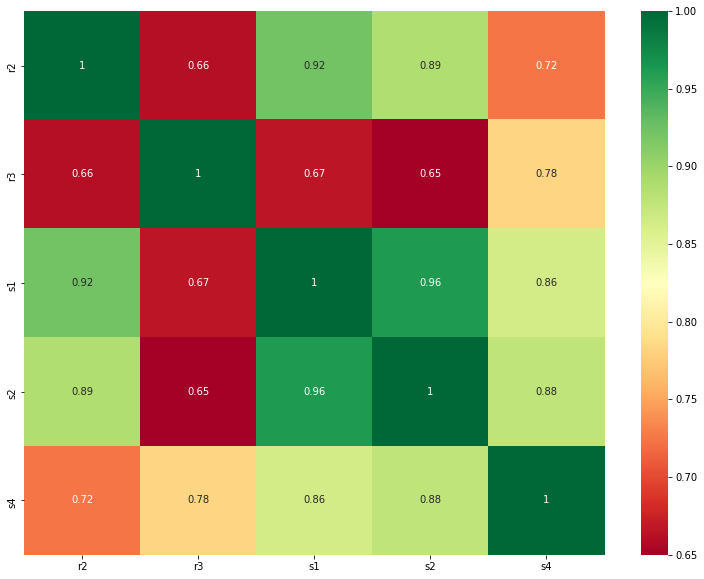

In [ ]:

plt.figure(figsize=(13,10))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [ ]:
input_dim=df_data[top_corr_features].shape[1] -1

In [ ]:

df_data[top_corr_features]


,r2,r3,s1,s2,s4,state
0,1,1,4.6,1.3,12.0,0.0
1,1,1,4.3,1.3,11.2,0.0
2,1,1,5.3,2.3,24.4,0.0
3,1,0,5.1,1.5,7.7,0.0
4,1,0,4.6,1.4,6.4,0.0
...,...,...,...,...,...,...
145,1,1,4.5,1.5,13.5,0.0
146,1,1,5.1,2.0,20.4,0.0
147,0,0,1.5,0.2,0.3,1.0
148,1,0,4.0,1.2,4.8,0.0


In [ ]:

# np_data = df_data.to_numpy()
np_data = df_data[top_corr_features].to_numpy()

print(np_data)



[[ 1.   1.   4.6  1.3 12.   0. ]
 [ 1.   1.   4.3  1.3 11.2  0. ]
 [ 1.   1.   5.3  2.3 24.4  0. ]
 [ 1.   0.   5.1  1.5  7.7  0. ]
 [ 1.   0.   4.6  1.4  6.4  0. ]
 [ 1.   1.   5.4  2.3 24.8  0. ]
 [ 1.   0.   5.8  1.8 10.4  0. ]
 [ 1.   1.   4.   1.   8.   0. ]
 [ 1.   0.   4.4  1.4  6.2  0. ]
 [ 1.   0.   4.6  1.5  6.9  0. ]
 [ 1.   1.   6.   2.5  3.   0. ]
 [ 1.   1.   5.2  2.  20.8  0. ]
 [ 0.   0.   1.5  0.4  1.2  1. ]
 [ 1.   1.   6.9  2.3 31.7  0. ]
 [ 1.   1.   4.2  1.2 10.1  0. ]
 [ 0.   0.   1.9  0.2  0.4  1. ]
 [ 1.   1.   4.8  1.8 17.3  0. ]
 [ 1.   0.   4.7  1.5  7.1  0. ]
 [ 1.   1.   5.6  2.2 24.6  0. ]
 [ 1.   1.   4.9  1.8 17.6  0. ]
 [ 0.   0.   1.6  0.2  0.6  1. ]
 [ 0.   0.   1.3  0.3  0.8  1. ]
 [ 1.   0.   4.5  1.5  6.8  0. ]
 [ 1.   1.   4.8  1.4 13.4  0. ]
 [ 1.   1.   3.9  1.1  8.6  0. ]
 [ 0.   0.   1.2  0.2  0.5  1. ]
 [ 1.   1.   5.7  2.3 26.2  0. ]
 [ 1.   0.   3.5  1.   3.5  0. ]
 [ 0.   0.   1.5  0.4  1.2  1. ]
 [ 0.   0.   1.2  0.2  0.5  1. ]
 [ 0.   0.

array([[4., 4., 2., 2., 2., 0.],
       [4., 4., 2., 2., 2., 0.],
       [4., 4., 3., 3., 3., 0.],
       [4., 1., 3., 2., 1., 0.],
       [4., 1., 2., 2., 1., 0.],
       [4., 4., 3., 3., 3., 0.],
       [4., 1., 3., 3., 1., 0.],
       [4., 4., 2., 2., 1., 0.],
       [4., 1., 2., 2., 1., 0.],
       [4., 1., 2., 2., 1., 0.],
       [4., 4., 3., 4., 1., 0.],
       [4., 4., 3., 3., 2., 0.],
       [1., 1., 1., 1., 1., 1.],
       [4., 4., 4., 3., 4., 0.],
       [4., 4., 2., 2., 1., 0.],
       [1., 1., 1., 1., 1., 1.],
       [4., 4., 2., 3., 2., 0.],
       [4., 1., 2., 2., 1., 0.],
       [4., 4., 3., 3., 3., 0.],
       [4., 4., 2., 3., 2., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [4., 1., 2., 2., 1., 0.],
       [4., 4., 2., 2., 2., 0.],
       [4., 4., 2., 2., 1., 0.],
       [1., 1., 1., 1., 1., 1.],
       [4., 4., 3., 3., 3., 0.],
       [4., 1., 2., 2., 1., 0.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1.

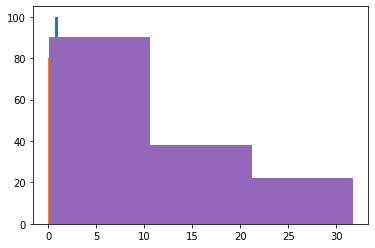

In [ ]:
def makeHistDat(col,binCount=3):
  n, bins, patches = plt.hist(col, bins=binCount)
  # print(n,bins,patches)
  return np.digitize(col,bins=bins)

for i in range(input_dim):
  np_data[:,i]=makeHistDat(np_data[:,i])
np_data  

In [ ]:
min_max_scaler = MinMaxScaler()

np_data = min_max_scaler.fit_transform(np_data)

In [ ]:
data_normal = np_data[np_data[:,-1]==0.,:]
data_defeat = np_data[np_data[:,-1]==1.,:]
X_data_defeat=data_defeat[:,0:-1]
y_data_defeat=data_defeat[:,  -1]






In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data_normal[:,:-1], 
                                                    data_normal[:,-1], 
                                                    test_size=0.1, 
                                                    shuffle=True, 
                                                    random_state=1004)

X_test,y_test


(array([[1.        , 1.        , 0.66666667, 0.66666667, 0.66666667],
        [1.        , 0.        , 0.66666667, 0.33333333, 0.        ],
        [1.        , 0.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 1.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 0.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 1.        , 0.33333333, 0.33333333, 0.33333333],
        [1.        , 1.        , 0.66666667, 0.66666667, 0.66666667],
        [1.        , 0.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 1.        , 0.33333333, 0.33333333, 0.33333333],
        [1.        , 0.        , 0.66666667, 0.66666667, 0.        ]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
latent_v=3
act_v='relu'

input_data = keras.Input(shape=(X_train.shape[1],))
encoded = layers.Dense(input_dim, activation='sigmoid')(input_data)
encoded = layers.Dense(input_dim/2, activation=act_v)(encoded)
encoded = layers.Dense(latent_v, activation=act_v)(encoded)
decoded = layers.Dense(latent_v, activation='tanh')(encoded)
decoded = layers.Dense(input_dim/2, activation=act_v)(decoded)
decoded = layers.Dense(input_dim, activation=act_v)(decoded)
decoded = layers.Dense(X_train.shape[1], activation='sigmoid')(decoded)

In [ ]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.0001)

autoencoder = Model(inputs=input_data, outputs=decoded)
# autoencoder = keras.Model(input_data, decoded)
autoencoder.compile(optimizer=adam, loss='mse',metrics=['accuracy'])

In [ ]:
# autoencoder.load_weights('/content/drive/MyDrive/Work/autoencoder.weight')
#autoencoder.load_weights('/content/drive/MyDrive/Work/w1.weight')

In [ ]:
history = autoencoder.fit(X_train, X_train,
                epochs=1000,
                batch_size=10,
                verbose=True,
                shuffle=True,
                validation_data=(X_test, X_test)).history

Epoch 1/1000
9/9 [==============================] - 1s 26ms/step - loss: 0.1357 - accuracy: 0.0000e+00 - val_loss: 0.1431 - val_accuracy: 0.0000e+00
Epoch 2/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1355 - accuracy: 0.0111 - val_loss: 0.1430 - val_accuracy: 0.0000e+00
Epoch 3/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1354 - accuracy: 0.0556 - val_loss: 0.1429 - val_accuracy: 0.1000
Epoch 4/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1352 - accuracy: 0.2889 - val_loss: 0.1428 - val_accuracy: 0.7000
Epoch 5/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1351 - accuracy: 0.6444 - val_loss: 0.1427 - val_accuracy: 0.7000
Epoch 6/1000
9/9 [==============================] - 0s 6ms/step - loss: 0.1349 - accuracy: 0.8556 - val_loss: 0.1426 - val_accuracy: 1.0000
Epoch 7/1000
9/9 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 1.0000 - val_loss: 0.1425 - val_accuracy: 1.0000
Epoch 8

In [ ]:
# autoencoder.save('/content/drive/MyDrive/Work/autoencoder2.weight')
autoencoder.save('/content/drive/MyDrive/Work/w1.weight')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Work/w1.weight/assets


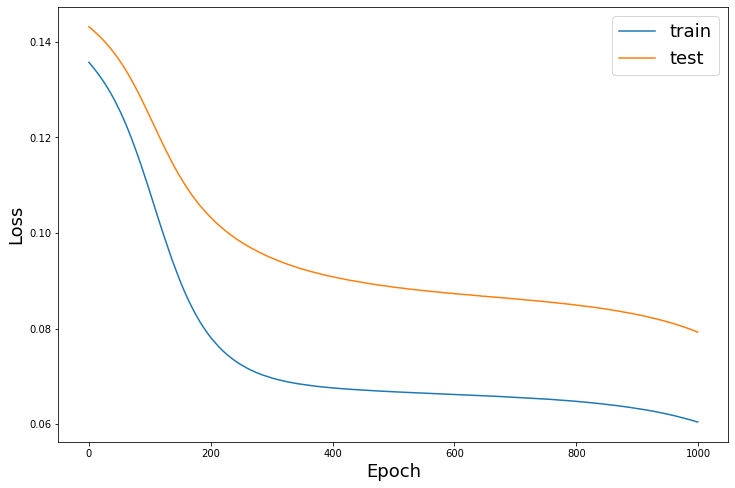

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.ylabel('Loss',fontsize= 18)
plt.xlabel('Epoch',fontsize= 18)
plt.legend(['train', 'test'], loc='upper right', fontsize= 18);

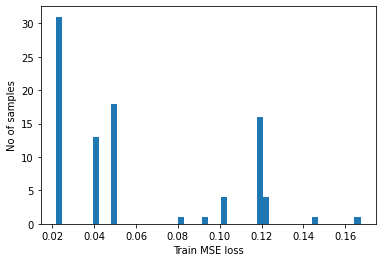

0.10093501171250051
Reconstruction error threshold:  0.10093501171250051


In [ ]:
x_train_pred = autoencoder.predict(X_train)
mse = np.mean(np.power(x_train_pred - X_train, 2), axis=1)

plt.hist(mse, bins=50)
plt.xlabel("Train MSE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.mean(mse) + np.std(mse) * 1
print(threshold)
print("Reconstruction error threshold: ", threshold)

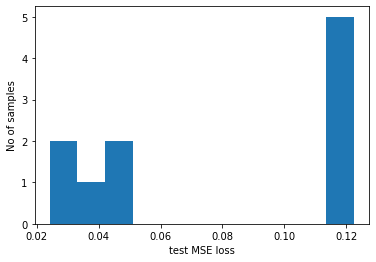

Reconstruction error threshold:  0.10093501171250051


In [ ]:
x_test_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(x_test_pred - X_test, 2), axis=1)

plt.hist(mse, bins=11)
plt.xlabel("test MSE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
print("Reconstruction error threshold: ", threshold)

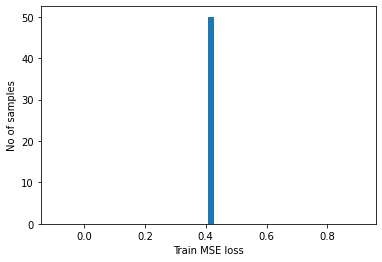

In [ ]:

X_data_defeat_pred = autoencoder.predict(X_data_defeat)
mse = np.mean(np.power(X_data_defeat_pred - X_data_defeat, 2), axis=1)

plt.hist(mse, bins=50)
plt.xlabel("Train MSE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = 23 # np.mean(mse) + np.std(mse) * 2


In [ ]:
x_data_defeat_pred = autoencoder.predict(X_data_defeat)
test_defeat_mse_loss = np.mean(np.power(x_data_defeat_pred - X_data_defeat,2), axis=1)

# Detect all the samples which are anomalies.
anomalies = test_defeat_mse_loss > threshold
print("Number of anomaly detected: ", np.sum(anomalies)/anomalies.shape[0] * 100,"%     " ,np.sum(anomalies)," / ", anomalies.shape[0])
print("Indices of anomaly detected: ", np.where(anomalies))

Number of anomaly detected:  0.0 %      0  /  50
Indices of anomaly detected:  (array([], dtype=int64),)


In [ ]:
X_test , y_data_defeat

(array([[1.        , 1.        , 0.66666667, 0.66666667, 0.66666667],
        [1.        , 0.        , 0.66666667, 0.33333333, 0.        ],
        [1.        , 0.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 1.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 0.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 1.        , 0.33333333, 0.33333333, 0.33333333],
        [1.        , 1.        , 0.66666667, 0.66666667, 0.66666667],
        [1.        , 0.        , 0.33333333, 0.33333333, 0.        ],
        [1.        , 1.        , 0.33333333, 0.33333333, 0.33333333],
        [1.        , 0.        , 0.66666667, 0.66666667, 0.        ]]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [ ]:
x_test_normal_pred = autoencoder.predict(X_test)
test_normal_mse_loss = np.mean(np.power(x_test_normal_pred - X_test,2), axis=1)

# Detect all the samples which are anomalies.
wrong_anomalies = test_normal_mse_loss < threshold
print("Number of anomaly detected: ", np.sum(wrong_anomalies)/wrong_anomalies.shape[0] * 100,"%     " ,np.sum(wrong_anomalies)," / ", wrong_anomalies.shape[0])
print("Indices of wrong anomaly detected: ", np.where(wrong_anomalies))

Number of anomaly detected:  100.0 %      10  /  10
Indices of wrong anomaly detected:  (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


In [ ]:
test_normal_mse_loss.mean(),test_defeat_mse_loss.mean()

(0.07926485913577062, 0.40827335902380163)

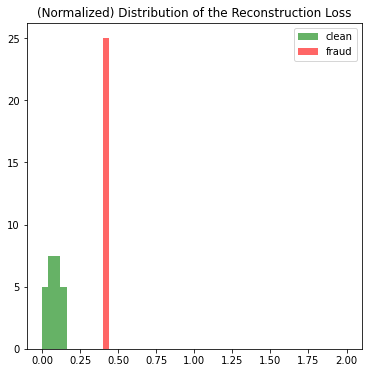

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

#ax.hist(mse, bins=50, density=True, label="train", alpha=.6, color="blue")
ax.hist(test_normal_mse_loss, bins=50, density=True, label="clean", alpha=.6, color="green", range=(0,2))
ax.hist(test_defeat_mse_loss, bins=50, density=True, label="fraud", alpha=.6, color="red" , range=(0,2))

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [ ]:
#y_test.__class__
x=np.vstack( [X_test,X_data_defeat])
y=np.hstack(  [y_test,y_data_defeat ])



In [ ]:
# x=np.random.permutation(x)

In [ ]:

X_test.shape 

(10, 5)

In [ ]:

predictions = autoencoder.predict( x )
mse = np.mean(np.power(x - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y})
error_df = error_df.sample(frac=1).reset_index(drop=True)
error_df

,reconstruction_error,true_class
0,0.408273,1.0
1,0.408273,1.0
2,0.408273,1.0
3,0.408273,1.0
4,0.408273,1.0
5,0.408273,1.0
6,0.408273,1.0
7,0.408273,1.0
8,0.408273,1.0
9,0.122512,0.0


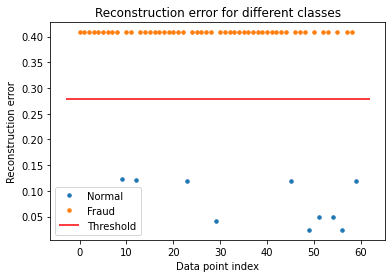

In [ ]:


groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
threshold = np.mean(mse) - np.std(mse) * 0.6

ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()


plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

# MAE

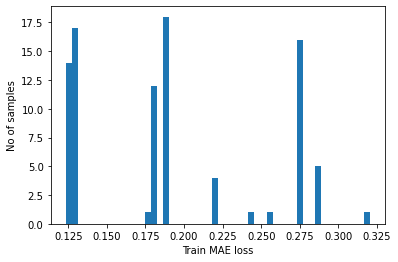

Reconstruction error threshold:  0.3206566949685415


In [ ]:
from matplotlib import pyplot as plt
# Get train MAE loss.
x_train_pred = autoencoder.predict(X_train)
train_mae_loss = np.mean(np.abs(x_train_pred - X_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

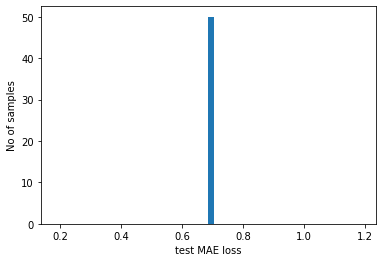

Number of anomaly detected:  50  /  50
Indices of anomaly detected:  (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),)


In [ ]:
# Get test MAE loss.
x_test_pred = autoencoder.predict(data_defeat[:,1:])
test_mae_loss = np.mean(np.abs(x_test_pred - data_defeat[:,1:]), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly detected: ", np.sum(anomalies)," / ", anomalies.shape[0])
print("Indices of anomaly detected: ", np.where(anomalies))

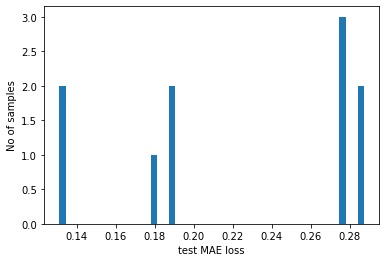

Number of wrong anomaly detected:  0  /  10
Indices of wrong anomaly detected:  (array([], dtype=int64),)


In [ ]:
# Get test MAE loss.
x_test_normal_pred = autoencoder.predict(X_test)
test_mae_loss = np.mean(np.abs(x_test_normal_pred - X_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
wrong_anomalies = test_mae_loss > threshold
print("Number of wrong anomaly detected: ", np.sum(wrong_anomalies)," / ", wrong_anomalies.shape[0])
print("Indices of wrong anomaly detected: ", np.where(wrong_anomalies))

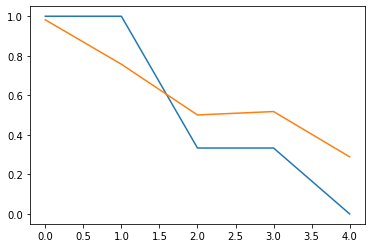

In [ ]:
# Checking how the first sequence is learnt
plt.plot(X_train[0])
plt.plot(x_train_pred[0])
plt.show()

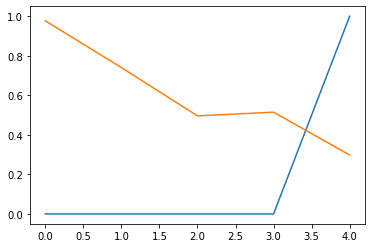

In [ ]:
plt.plot(data_defeat[0,1:])
plt.plot(autoencoder.predict(data_defeat[:,1:])[0])
plt.show()